<a href="https://colab.research.google.com/github/karry3012/ANN/blob/main/Face_Expression_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [2]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 99% 60.0M/60.3M [00:04<00:00, 23.0MB/s]
100% 60.3M/60.3M [00:04<00:00, 15.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
# train_new = ImageDataGenerator(
#     rescale = 1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)


# test_new = ImageDataGenerator(rescale=1./255)

# train_new_data = train_new.flow_from_directory(
#     '/content/train',
#         target_size=(256, 256),
#         batch_size=32,
#         class_mode='sparse'
# )

# test_new_data = test_new.flow_from_directory(
#     '/content/test',
#         target_size=(256, 256),
#         batch_size=32,
#         class_mode='sparse'
# )

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train',
labels='inferred',
label_mode = 'int',
batch_size=32, image_size=(256, 256)
)

Found 28709 files belonging to 7 classes.


In [7]:
val_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train',
labels='inferred',
label_mode = 'int',
batch_size=32, image_size=(256, 256)
)

Found 28709 files belonging to 7 classes.


In [8]:
def process (image, label):
  image = tf. cast(image/255. ,tf.float32)
  return image, label
train_ds = train_ds.map(process)
valid_ds = val_ds.map(process)

In [9]:
model = Sequential()
model.add(Conv2D(50,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(100,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(150,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dense(55,activation='relu'))
model.add(Dense(7,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 50)        │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 50)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 100)       │          45,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 150)         │         135,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 150)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 135000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │      20,250,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 55)                  │           8,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             392 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,440,497 (77.97 MB)

 Trainable params: 20,440,497 (77.97 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=2,          # Number of epochs with no improvement
                               restore_best_weights=True)

In [13]:
history = model.fit(
    train_ds,
    epochs =15,
    validation_data = valid_ds, callbacks=[early_stopping]
)

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 138ms/step - accuracy: 0.2723 - loss: 1.7838 - val_accuracy: 0.3939 - val_loss: 1.5600
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.3956 - loss: 1.5496 - val_accuracy: 0.4711 - val_loss: 1.3756
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 127s 131ms/step - accuracy: 0.4520 - loss: 1.4062 - val_accuracy: 0.5410 - val_loss: 1.2158
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.5159 - loss: 1.2673 - val_accuracy: 0.5902 - val_loss: 1.0923
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 117s 131ms/step - accuracy: 0.5764 - loss: 1.1220 - val_accuracy: 0.6660 - val_loss: 0.9078
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.6424 - loss: 0.9621 - val_accuracy: 0.7035 - val_loss: 0.8168
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7109 - loss: 0.7936 - val_accuracy: 0.7434 - val_loss: 0.7153
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7771 -

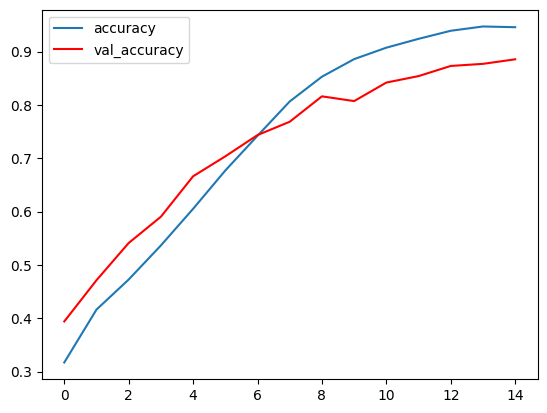

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')
plt.legend()
plt.show()

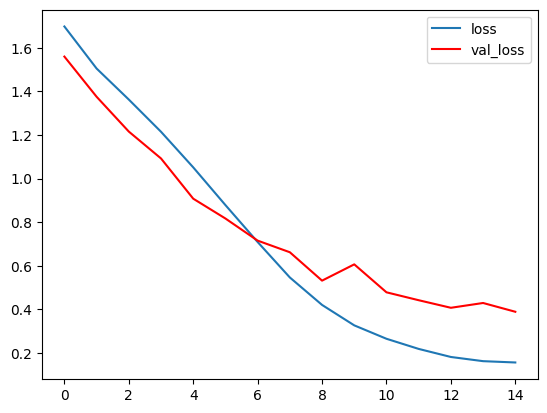

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],color='red',label='val_loss')
plt.legend()
plt.show()

In [19]:
import cv2
import numpy as np

In [20]:
test_img2 = cv2.imread('/content/cry.jpeg')

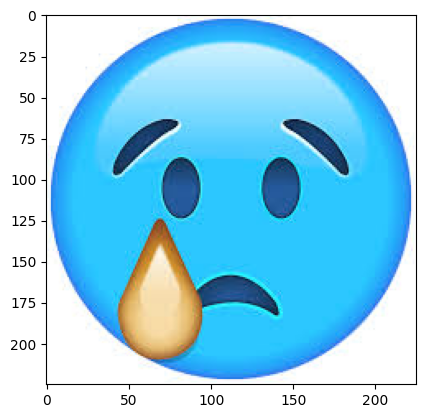

In [21]:
plt.imshow(test_img2)

In [22]:
test_img2 = cv2.resize(test_img2,(256,256))

In [23]:
test_dt1 = test_img2.reshape((1,256,256,3))

In [24]:
pred =model.predict(test_dt1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [25]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_index = np.argmax(pred)
predicted_label = class_labels[predicted_index]

In [26]:
predicted_label

'Neutral'

In [44]:
test_img3 = cv2.imread('/content/happy3.jpeg')

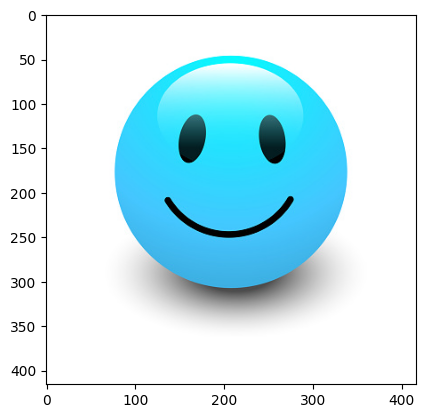

In [45]:
plt.imshow(test_img3)

In [46]:
test_img3 = cv2.resize(test_img3,(256,256))

In [47]:

test_dt2 = test_img3.reshape((1,256,256,3))

In [48]:
pred =model.predict(test_dt2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [49]:
predicted_index = np.argmax(pred)
predicted_label = class_labels[predicted_index]

In [50]:
predicted_label

'Happy'

In [34]:
test_img4 = cv2.imread('/content/fear4.jpeg')

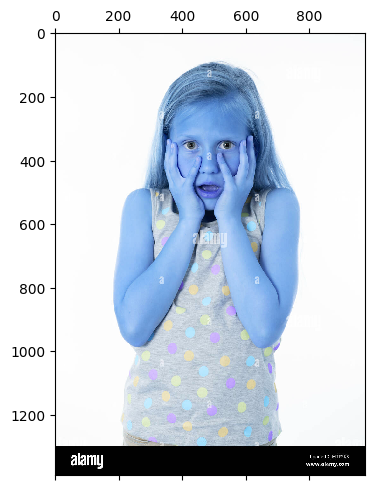

In [35]:
plt.matshow(test_img4)

In [36]:
test_img4 = cv2.resize(test_img4,(256,256))

In [37]:

test_dt3 = test_img4.reshape((1,256,256,3))

In [38]:
pred =model.predict(test_dt3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [39]:
pred

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [40]:
predicted_index = np.argmax(pred)
predicted_label = class_labels[predicted_index]

In [41]:
predicted_label

'Fear'

In [51]:
from keras.models import load_model

In [52]:
model.save('expression_model.h5')

In [53]:
from google.colab import files

# Download the saved model file
files.download('expression_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>